In [54]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

queries_df = pd.read_csv("Queries.csv")
print(queries_df.head())

                                 Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  35.83%   
1                        thecleverprogrammer    2809         3456  81.28%   
2           python projects with source code    2077        73380   2.83%   
3  classification report in machine learning    2012         4959  40.57%   
4                      the clever programmer    1931         2528  76.38%   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  


In [55]:
queries_df.head(10)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09
5,standard scaler in machine learning,1559,7292,21.38%,1.53
6,aman kharwal,1490,5752,25.9%,3.75
7,python turtle graphics code,1455,13585,10.71%,4.60
8,python game projects with source code,1421,4946,28.73%,2.23
9,82 python projects with source code,1343,3562,37.7%,1.32


In [56]:
queries_df.describe

<bound method NDFrame.describe of                                    Top queries  Clicks  Impressions     CTR  \
0                  number guessing game python    5223        14578  35.83%   
1                          thecleverprogrammer    2809         3456  81.28%   
2             python projects with source code    2077        73380   2.83%   
3    classification report in machine learning    2012         4959  40.57%   
4                        the clever programmer    1931         2528  76.38%   
..                                         ...     ...          ...     ...   
995     human activity recognition python code      48          369  13.01%   
996                python contact book project      48          334  14.37%   
997                why standard scaler is used      48          295  16.27%   
998     credit scoring machine learning python      48          243  19.75%   
999                     numpy useful functions      48          166  28.92%   

     Position  
0

In [57]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


# **EDA**

In [58]:
# Let's turn the CTR column from percentage string to a float
queries_df['CTR'] = queries_df['CTR'].str.rstrip('%').astype('float')

In [59]:
queries_df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83,1.61
1,thecleverprogrammer,2809,3456,81.28,1.02
2,python projects with source code,2077,73380,2.83,5.94
3,classification report in machine learning,2012,4959,40.57,1.28
4,the clever programmer,1931,2528,76.38,1.09


### Let's analyze common words in each search history

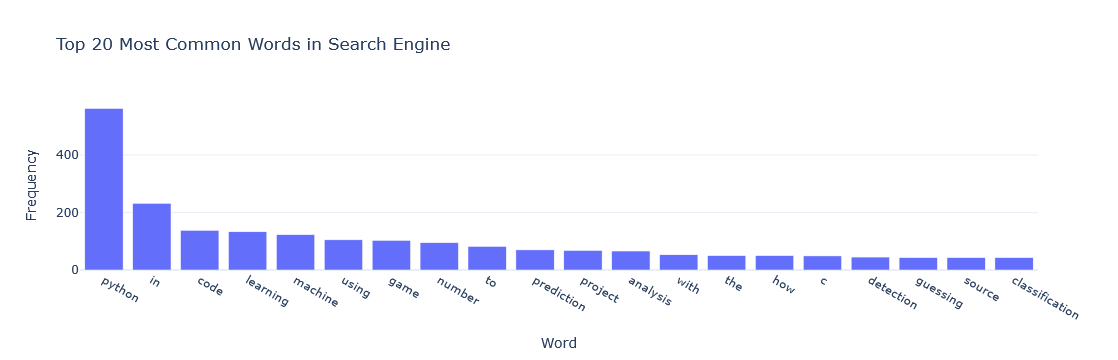

In [60]:
# Function to clean and split the queries into words
def clean_and_split(query):
    words = re.findall(r'\b[a-zA-Z]+\b', query.lower())
    return words

# Spliting all the query into words and count the frequency of each words
word_counts = Counter()
for query in queries_df['Top queries']:
    word_counts.update(clean_and_split(query))

word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# ploting the word frequencies
fig = px.bar(word_freq_df, x='Word', y='Frequency', title="Top 20 Most Common Words in Search Engine")
fig.show()

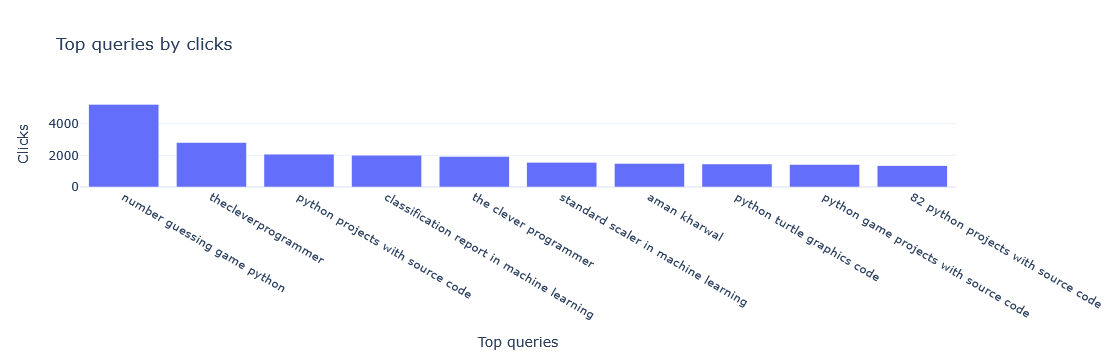

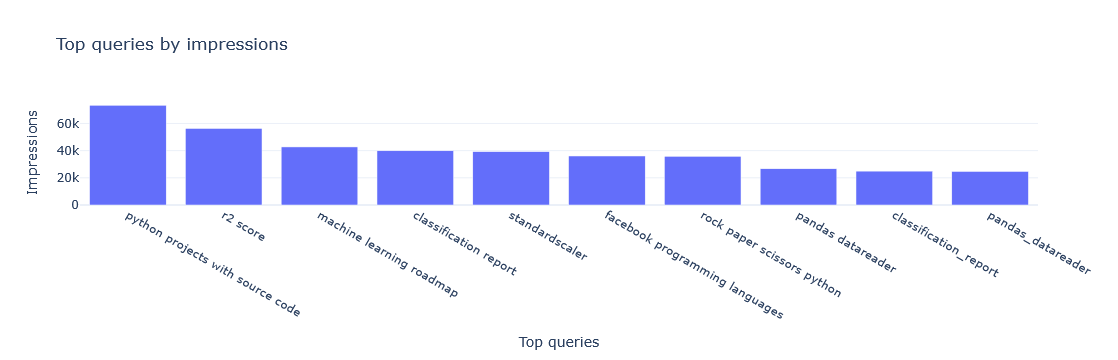

In [61]:
# top queries by clicks and impressions
top_queries_clicks_vis = queries_df.nlargest(10, 'Clicks')[['Top queries', 'Clicks']]
top_queries_impressions_vis = queries_df.nlargest(10, 'Impressions')[['Top queries', 'Impressions']]

# plotting
fig_clicks = px.bar(top_queries_clicks_vis, x='Top queries', y='Clicks', title='Top queries by clicks')
fig_impressions = px.bar(top_queries_impressions_vis, x='Top queries', y='Impressions', title='Top queries by impressions')
fig_clicks.show()
fig_impressions.show()

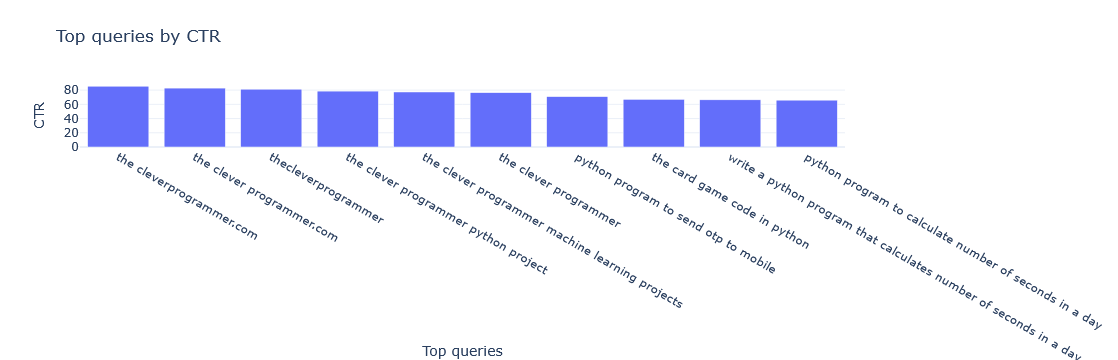

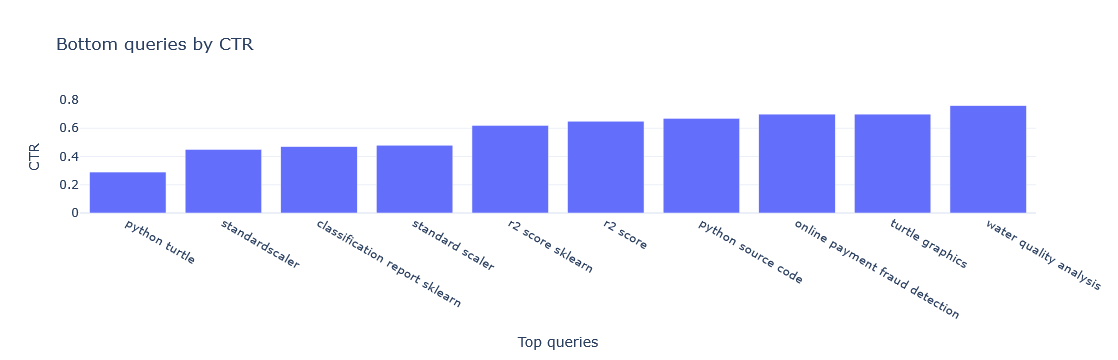

In [62]:
# highest and lowest CTR's
top_ctr_vis = queries_df.nlargest(10, 'CTR')[['Top queries', 'CTR']]
bottom_ctr_vis = queries_df.nsmallest(10, 'CTR')[['Top queries', 'CTR']]

# plotting
fig_top_ctr = px.bar(top_ctr_vis, x='Top queries', y='CTR', title='Top queries by CTR')
fig_bottom_ctr = px.bar(bottom_ctr_vis, x='Top queries', y='CTR', title='Bottom queries by CTR')
fig_top_ctr.show()
fig_bottom_ctr.show()

In [63]:
# correlation matrix
correlation_matrix = queries_df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()
fig_corr = px.imshow(correlation_matrix,
                     title='Correlation Matrix', 
                     color_continuous_scale='Viridis', 
                     text_auto='.3f')
fig_corr.show()

In this correlation matrix:

* Clicks and Impressions are positively correlated, meaning more Impressions tend to lead to more Clicks.
* Clicks and CTR have a weak positive correlation, implying that more Clicks might slightly increase the Click-Through Rate.
* Clicks and Position are weakly negatively correlated, suggesting that higher ad or page Positions may result in fewer Clicks.
* Impressions and CTR are negatively correlated, indicating that higher Impressions tend to result in a lower Click-Through Rate.
* Impressions and Position are positively correlated, indicating that ads or pages in higher Positions receive more Impressions.
* CTR and Position have a strong negative correlation, meaning that higher Positions result in lower Click-Through Rates.

Clicks ↑ when Impressions ↑
👉 The more people see your ad/page, the more likely some will click. Makes sense, right?

Clicks vs CTR = weak positive
👉 If you get a lot of clicks, CTR might go up a little, but not always, because CTR also depends on impressions.

Clicks vs Position = weak negative
👉 If your ad/page is in a worse position (like showing lower on Google), you’ll usually get fewer clicks.

Impressions vs CTR = negative
👉 If tons of people see your page but don’t click, your CTR drops. High reach doesn’t always mean high quality clicks.

Impressions vs Position = positive
👉 Higher-ranked pages (better position) are seen more, so they get more impressions.

CTR vs Position = strong negative
👉 The lower your position (further down the page), the worse your CTR. Basically, people rarely scroll + click.

📌 Think of it like this:
* Position = where you are on Google.
* Impressions = how many people saw you.
* Clicks = how many people actually clicked.
* CTR = how attractive your result looks (clicks ÷ impressions).

## Detecting Anomalies in Search Queries

Now, let’s detect anomalies in search queries. You can use various techniques for anomaly detection. A simple and effective method is the Isolation Forest algorithm, which works well with different data distributions and is efficient with large datasets:

In [64]:
from sklearn.ensemble import IsolationForest

# selecting relevant features
features = queries_df[['Clicks', 'Impressions', 'CTR', 'Position']]

# Initializing Isolation Forest
iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.01)

# Fitting the model
iso_forest.fit(features)

# predicting anomalies
queries_df['anomaly'] = iso_forest.predict(features)

# Filtering the anomalies
anomalies = queries_df[queries_df['anomaly'] == 1]

In [65]:
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])

                                   Top queries  Clicks  Impressions    CTR  \
3    classification report in machine learning    2012         4959  40.57   
5          standard scaler in machine learning    1559         7292  21.38   
6                                 aman kharwal    1490         5752  25.90   
7                  python turtle graphics code    1455        13585  10.71   
8        python game projects with source code    1421         4946  28.73   
..                                         ...     ...          ...    ...   
995     human activity recognition python code      48          369  13.01   
996                python contact book project      48          334  14.37   
997                why standard scaler is used      48          295  16.27   
998     credit scoring machine learning python      48          243  19.75   
999                     numpy useful functions      48          166  28.92   

     Position  
3        1.28  
5        1.53  
6        3.75  

The anomalies in our search query data are not just outliers. They are indicators of potential areas for growth, optimization, and strategic focus. These anomalies are reflecting emerging trends or areas of growing interest. Staying responsive to these trends will help in maintaining and growing the website’s relevance and user engagement.